## Data Information:
The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn import metrics


In [3]:
header = ["letter", "rec_1", "rec_2", "rec_3", "rec_4", "rec_5", "rec_6", "rec_7", "rec_8", "rec_9", "rec_10", "rec_11", "rec_12", "rec_13", "rec_14", "rec_15", "rec_16"]
df = pd.read_csv("./Data/letter-recognition.data", names = header)

In [4]:
print(df.shape)
df.dtypes

(20000, 17)


letter    object
rec_1      int64
rec_2      int64
rec_3      int64
rec_4      int64
rec_5      int64
rec_6      int64
rec_7      int64
rec_8      int64
rec_9      int64
rec_10     int64
rec_11     int64
rec_12     int64
rec_13     int64
rec_14     int64
rec_15     int64
rec_16     int64
dtype: object

# Prep

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
letter    20000 non-null object
rec_1     20000 non-null int64
rec_2     20000 non-null int64
rec_3     20000 non-null int64
rec_4     20000 non-null int64
rec_5     20000 non-null int64
rec_6     20000 non-null int64
rec_7     20000 non-null int64
rec_8     20000 non-null int64
rec_9     20000 non-null int64
rec_10    20000 non-null int64
rec_11    20000 non-null int64
rec_12    20000 non-null int64
rec_13    20000 non-null int64
rec_14    20000 non-null int64
rec_15    20000 non-null int64
rec_16    20000 non-null int64
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
pd.isna(df).any()

letter    False
rec_1     False
rec_2     False
rec_3     False
rec_4     False
rec_5     False
rec_6     False
rec_7     False
rec_8     False
rec_9     False
rec_10    False
rec_11    False
rec_12    False
rec_13    False
rec_14    False
rec_15    False
rec_16    False
dtype: bool

In [7]:
pd.isnull(df).any()

letter    False
rec_1     False
rec_2     False
rec_3     False
rec_4     False
rec_5     False
rec_6     False
rec_7     False
rec_8     False
rec_9     False
rec_10    False
rec_11    False
rec_12    False
rec_13    False
rec_14    False
rec_15    False
rec_16    False
dtype: bool

# Modèle

In [8]:
col_y = "letter"

In [9]:
X = df.drop(col_y, axis="columns")
Y = df[col_y]

In [10]:
X_train, X_test      , y_train, y_test       = train_test_split(X      ,Y      , test_size=0.15)
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train, test_size=0.03)
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape, X_test.shape, y_test.shape

((16490, 16), (510, 16), (16490,), (510,), (3000, 16), (3000,))

In [11]:
## Premier modèle simple (Random Forest)

r = []
for i in range(50):
    hyperparametres = {"n_estimators" : 20 , 
                       "n_jobs"       : -1 }
    algo = RandomForestClassifier(**hyperparametres)
    modele = algo.fit(X_train.select_dtypes(exclude=["object"]), y_train)
    score = modele.score(X_test, y_test)
    r.append(score)
    print(score, end=" / ")

0.9543333333333334 / 0.9523333333333334 / 0.9563333333333334 / 0.9556666666666667 / 0.9506666666666667 / 0.9526666666666667 / 0.9536666666666667 / 0.953 / 0.9533333333333334 / 0.9536666666666667 / 0.953 / 0.9536666666666667 / 0.9523333333333334 / 0.955 / 0.956 / 0.954 / 0.9553333333333334 / 0.955 / 0.9543333333333334 / 0.951 / 0.9543333333333334 / 0.9583333333333334 / 0.9566666666666667 / 0.9536666666666667 / 0.9526666666666667 / 0.9573333333333334 / 0.9526666666666667 / 0.9553333333333334 / 0.9526666666666667 / 0.957 / 0.956 / 0.9553333333333334 / 0.953 / 0.956 / 0.9583333333333334 / 0.9526666666666667 / 0.956 / 0.957 / 0.952 / 0.955 / 0.9576666666666667 / 0.956 / 0.9616666666666667 / 0.9546666666666667 / 0.9553333333333334 / 0.9566666666666667 / 0.9526666666666667 / 0.9546666666666667 / 0.9533333333333334 / 0.9546666666666667 / 

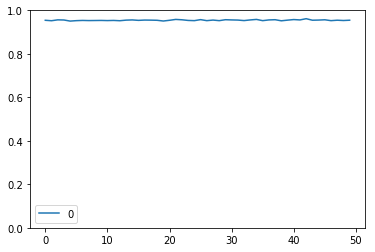

In [12]:
#Plot results
%matplotlib inline
pd.DataFrame(r).plot(ylim=[0,1])

In [13]:
#Variable Importance
list(zip(X_train.columns, modele.feature_importances_))

[('rec_1', 0.022061604895911163),
 ('rec_2', 0.024089699116040666),
 ('rec_3', 0.02187542120527685),
 ('rec_4', 0.021150179746261055),
 ('rec_5', 0.026660331179899355),
 ('rec_6', 0.05083867977751198),
 ('rec_7', 0.07186588632893204),
 ('rec_8', 0.07725340301254607),
 ('rec_9', 0.09743564564098262),
 ('rec_10', 0.07275185173132002),
 ('rec_11', 0.08546805000934013),
 ('rec_12', 0.08369236397239622),
 ('rec_13', 0.11167940012347881),
 ('rec_14', 0.07296158695387815),
 ('rec_15', 0.10627765944171456),
 ('rec_16', 0.05393823686451025)]

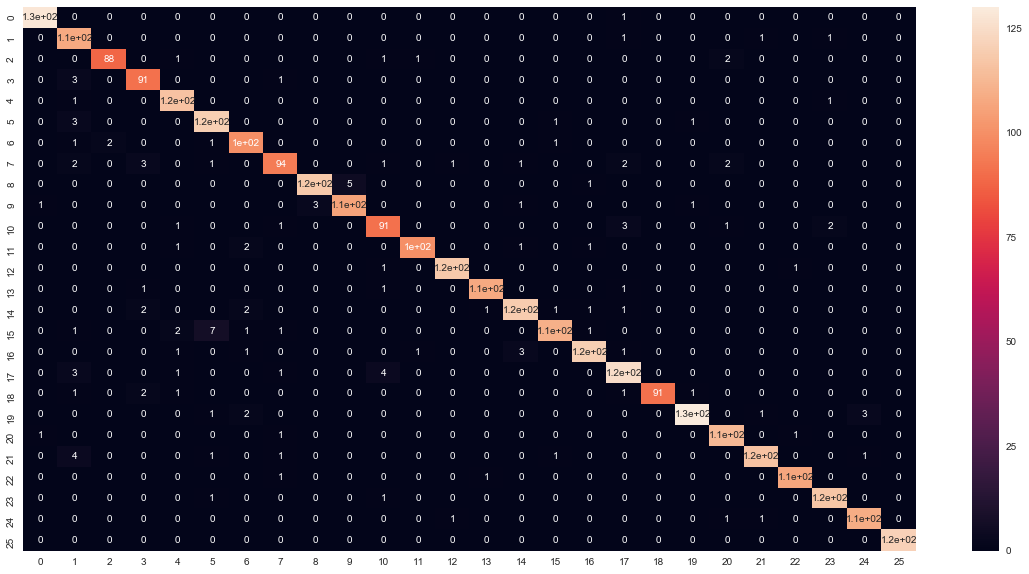

In [14]:
#Plot Confusion Matrix

y_pred = modele.predict(X_test) #Prédiction

array = confusion_matrix(y_test, y_pred) #Comparaison

df_cm = pd.DataFrame(array, range(26),
                  range(26))
plt.figure(figsize = (20,10))
sns.set(font_scale=1)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10})# font size

In [15]:
y_test.shape

(3000,)

In [16]:
#ROC
#
#y = np.array([1, 1, 2, 2])
#pred = np.array([0.1, 0.4, 0.35, 0.8])
#
#y_test = np.array(y_test)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
#metrics.auc(fpr, tpr)

## Grid Search

In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score

In [53]:
r ={} 
hyperparametres = {"n_estimators" : 20 , 
                       "n_jobs"       : -1 }
clf = RandomForestClassifier(**hyperparametres)

param_grid = {  'min_samples_split' : [5, 10, 15],
                'n_estimators': [20, 40, 60],
                'max_depth' :range(10)[1:],
                'max_features':[2, 8, 14]
}

#scorers = { 'precision_score': make_scorer(precision_score) ,
#            'recall_score'   : make_scorer(recall_score)    ,
#            'accuracy_score' : make_scorer(accuracy_score)  }
scorers = 'precision'

skf = StratifiedKFold(n_splits=3)

grid_search= GridSearchCV(clf,
                          param_grid,
                          scoring='%s_micro' % scorers,
                          cv=skf,
                          return_train_score=True,
                          n_jobs=11)

In [54]:
grid_search.fit(X_train.values,y_train.values)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=11,
       param_grid={'min_samples_split': [5, 10, 15], 'n_estimators': [20, 40, 60], 'max_depth': range(1, 10), 'max_features': [2, 8, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='precision_micro', verbose=0)

In [56]:
y_pred = grid_search.predict(X_test.values)
print(grid_search.best_params_)
results = pd.DataFrame()
r[str(param_grid)] =  grid_search.best_score_
print(grid_search.best_score_)

{'max_depth': 9, 'max_features': 2, 'min_samples_split': 5, 'n_estimators': 40}
0.8187992722862341


In [57]:
r[str(param_grid)] =  grid_search.best_score_
r

{"{'min_samples_split': [5, 10, 15], 'n_estimators': [20, 40, 60], 'max_depth': range(1, 10), 'max_features': [2, 8, 14]}": 0.8187992722862341}